In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

customer_data = pd.read_csv("data/Mall_Customers.csv")
customer_data.head()



,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
#check for null or missing values
customer_data.isnull().sum()


CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

### Look at the data and see how it is distributed:

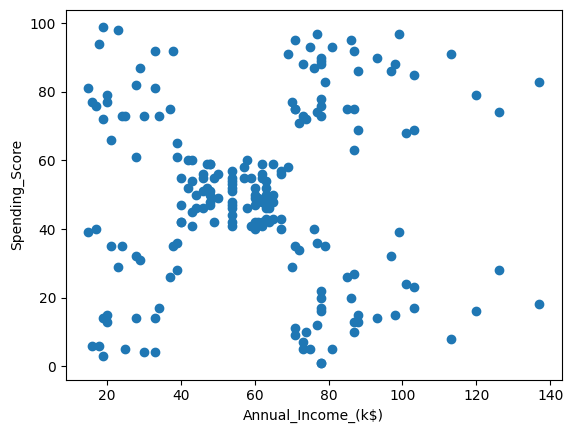

In [17]:
plt.scatter(customer_data["Annual_Income_(k$)"], customer_data["Spending_Score"])
plt.xlabel('Annual_Income_(k$)')
plt.ylabel('Spending_Score')
plt.show()

#### From the above scatterplot, it is difficult to tell if there is any pattern in the dataset. So i will apply Clustering


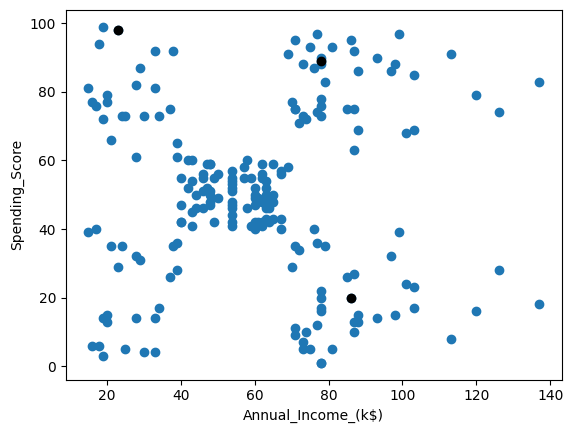

In [25]:
# i'll give k a value of random value = 3 to the results 
K=3
centroids = customer_data.sample(n=K)
plt.scatter(customer_data["Annual_Income_(k$)"], customer_data["Spending_Score"] ) 
plt.scatter(centroids["Annual_Income_(k$)"] ,centroids["Spending_Score"] ,c='black') 
plt.xlabel('Annual_Income_(k$)')
plt.ylabel('Spending_Score')
plt.show()

Next, i will iterate through each centroid and data point, calculate the distance between them, find the K clusters and assign the data points to a significant cluster. This process will continue until the difference between previously defined centroids and current centroids is zero:



#### First let's see the values of Genre


In [26]:
customer_data['Genre'] 

0        Male
1        Male
2      Female
3      Female
4      Female
        ...  
195    Female
196    Female
197      Male
198      Male
199      Male
Name: Genre, Length: 200, dtype: object

There is only 2 values so i'll use one-hot-encoding to make male = 0 and female = 1 

In [28]:
#one hot encoding implementation
customer_data = pd.get_dummies(customer_data, columns=["Genre"], drop_first=True)


In [29]:
customer_data.head()

,CustomerID,Age,Annual_Income_(k$),Spending_Score,Genre_Male
0,1,19,15,39,True
1,2,21,15,81,True
2,3,20,16,6,False
3,4,23,16,77,False
4,5,31,17,40,False


#### Identify Non-Centroids:


In [32]:
mask = customer_data["CustomerID"].isin(centroids.CustomerID.tolist())   #this mask gets the points that are centroids
print(mask.head()) 


0    False
1    False
2    False
3    False
4    False
Name: CustomerID, dtype: bool


In [34]:
X = customer_data[~mask] #get all data points that are not centroids (gets the tuples that are False from the precedent cell)
X.head()

,CustomerID,Age,Annual_Income_(k$),Spending_Score,Genre_Male
0,1,19,15,39,True
1,2,21,15,81,True
2,3,20,16,6,False
3,4,23,16,77,False
4,5,31,17,40,False


### Clustering Loop:

In [44]:
diff = 1
j=0 # number of iterations
XD=X
while(diff!=0):
   i=1
   for index1,row_c in centroids.iterrows():
       ED=[] # trivial distance
       for index2,row_d in XD.iterrows():
           # d: distance
           d1=(row_c["Annual_Income_(k$)"] - row_d["Annual_Income_(k$)"])**2 
           d2=(row_c["Spending_Score"] - row_d["Spending_Score"])**2 
           d=np.sqrt(d1+d2)
           ED.append(d)
       X[i]=ED # the 3 distances from each point to the 3 centroids 
       i=i+1
   #Assign Clusters
   #Each data point is assigned to the nearest centroid (cluster) by finding the minimum distance.
   C=[]
   for index,row in X.iterrows():
       min_dist=row[1]  
       pos=1
       for i in range(K):
           if row[i+1] < min_dist:
               min_dist = row[i+1]
               pos=i+1
       C.append(pos)
   X["Cluster"]=C
   print(X)
   
   #Update Centroids

   try:
    centroids_new = X.groupby(["Cluster"]).mean()[["Spending_Score","Annual_Income_(k$)"]]
   except Exception as e:
       print(f'error : {str(e)}')
       
   #check for convergence 
   if j == 0:
       diff=1
       j=j+1
   else:
       diff = (centroids_new['Spending_Score'] - centroids['Spending_Score']).sum() + (centroids_new['Annual_Income_(k$)'] - centroids['Annual_Income_(k$)']).sum()
   centroids = X.groupby(["Cluster"]).mean()[["Spending_Score","Annual_Income_(k$)"]]

     CustomerID  Age  Annual_Income_(k$)  Spending_Score  Genre_Male  \
0             1   19                  15              39        True   
1             2   21                  15              81        True   
2             3   20                  16               6       False   
3             4   23                  16              77       False   
4             5   31                  17              40       False   
..          ...  ...                 ...             ...         ...   
195         196   35                 120              79       False   
196         197   45                 126              28       False   
197         198   32                 126              74        True   
198         199   32                 137              18        True   
199         200   30                 137              83        True   

             1           2          3  Cluster  
0    31.128783   83.632693  74.861694        1  
1    43.087229   71.769411  95.301245

C:\Users\user\AppData\Local\Temp\ipykernel_10084\1764725986.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED # the 3 distances from each point to the 3 centroids are put into the array ED to assign the data point to the nearest centroid
C:\Users\user\AppData\Local\Temp\ipykernel_10084\1764725986.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
C:\Users\user\AppData\Local\Temp\ipykernel_10084\1764725986.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

### Now if we will view the dataset and all the data points should be clustered accordingly:



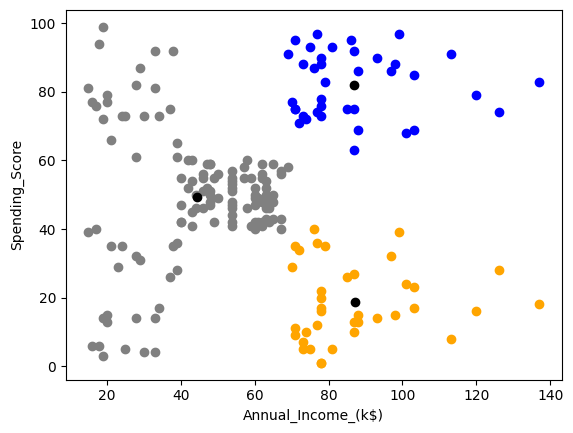

In [46]:
color=['grey','blue','orange']
for k in range(K):
   data=X[X["Cluster"]==k+1]
   plt.scatter(data["Annual_Income_(k$)"],data["Spending_Score"],c=color[k])
plt.scatter(centroids["Annual_Income_(k$)"],centroids["Spending_Score"],c='black')
plt.xlabel('Annual_Income_(k$)')
plt.ylabel('Spending_Score')
plt.show()

### use the KMeans algo from sklearn.cluster

In [49]:
from sklearn.cluster import  KMeans 
km_sample = KMeans(n_clusters= 3) 
km_sample.fit(customer_data[["Annual_Income_(k$)" , "Spending_Score"]]) 

KMeans(n_clusters=3)

<Axes: xlabel='Annual_Income_(k$)', ylabel='Spending_Score'>

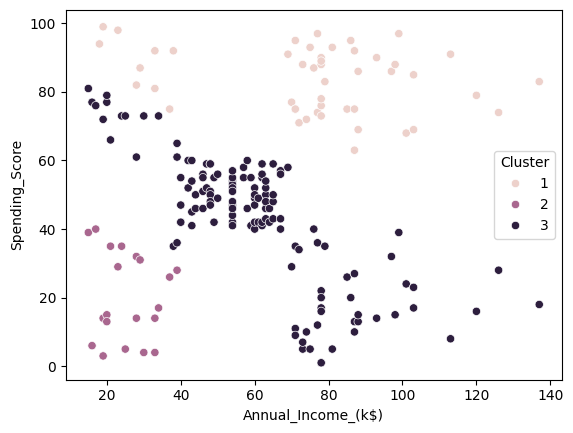

In [17]:
import seaborn as sns #sns -> heatmap for the results
labels_sample = km_sample.labels_ 
customer_data['label'] = labels_sample
sns.scatterplot(x='Annual_Income_(k$)', y='Spending_Score', hue='Cluster', data=X)


### How to choose the optimal value for K? 


## Elbow method

#### Perform K-means clustering with all the K values. For each K value, we compute the average distance to the centroid across all the data points:

In [56]:

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8]) 
x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3]) 
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
X

array([[3, 5],
       [1, 4],
       [1, 5],
       [2, 6],
       [1, 5],
       [6, 8],
       [6, 6],
       [6, 7],
       [5, 6],
       [6, 7],
       [7, 1],
       [8, 2],
       [9, 1],
       [8, 2],
       [9, 3],
       [9, 2],
       [8, 3]])

In [58]:
distortions = [] 
K = range(1,10) #test it on 10 iterations
for k in K:
   kmeanModel = KMeans(n_clusters=k)  
   kmeanModel.fit(X)
   distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

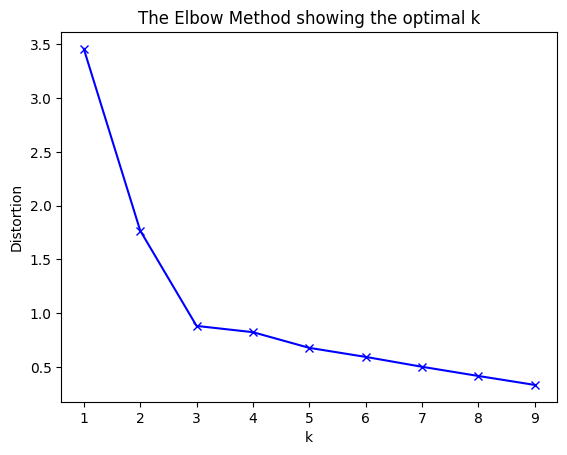

In [60]:
# Plot
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Silhouette method


In [62]:
from sklearn.metrics import silhouette_score

sil_avg = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for k in range_n_clusters:
 kmeans = KMeans(n_clusters = k).fit(X)
 labels = kmeans.labels_
 sil_avg.append(silhouette_score(X, labels, metric = 'euclidean'))

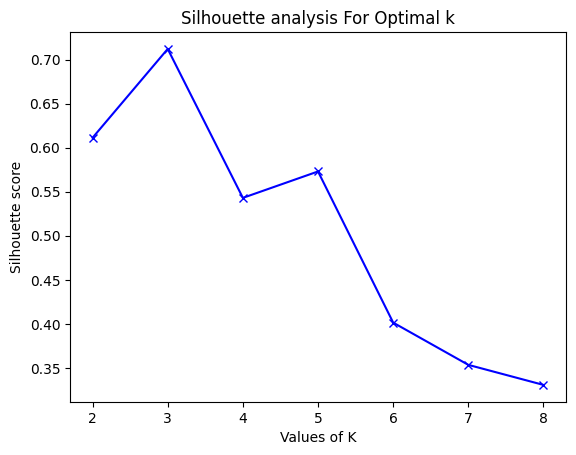

In [63]:
plt.plot(range_n_clusters,sil_avg,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [64]:

kmeans = KMeans(n_clusters = 3).fit(X)
labels = kmeans.labels_
sil_avg.append(silhouette_score(X, labels, metric = 'euclidean')) #todo: add other values for metric we can test

In [65]:
# test our result
import numpy as np

new_data_point = np.array([[12,3]])  
new_data_cluster = kmeans.predict(new_data_point)
print(f'New data point belongs to cluster: {new_data_cluster[0]}')


New data point belongs to cluster: 1
